# Introduction to OpenCV
https://docs.opencv.org/4.5.2/da/df6/tutorial_py_table_of_contents_setup.html

In [275]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

%matplotlib inline

## Changing Colorspace
- cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
- cv2.inRange()

In [473]:
img = cv.imread('lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2HSV)

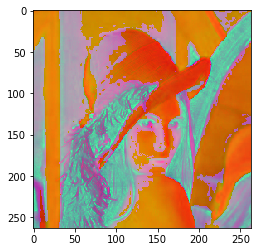

In [474]:
plt.imshow(img[:, :, ::-1])

In [475]:
[i for i in dir(cv) if i.startswith('COLOR_')]

['COLOR_BAYER_BG2BGR',
 'COLOR_BAYER_BG2BGRA',
 'COLOR_BAYER_BG2BGR_EA',
 'COLOR_BAYER_BG2BGR_VNG',
 'COLOR_BAYER_BG2GRAY',
 'COLOR_BAYER_BG2RGB',
 'COLOR_BAYER_BG2RGBA',
 'COLOR_BAYER_BG2RGB_EA',
 'COLOR_BAYER_BG2RGB_VNG',
 'COLOR_BAYER_GB2BGR',
 'COLOR_BAYER_GB2BGRA',
 'COLOR_BAYER_GB2BGR_EA',
 'COLOR_BAYER_GB2BGR_VNG',
 'COLOR_BAYER_GB2GRAY',
 'COLOR_BAYER_GB2RGB',
 'COLOR_BAYER_GB2RGBA',
 'COLOR_BAYER_GB2RGB_EA',
 'COLOR_BAYER_GB2RGB_VNG',
 'COLOR_BAYER_GR2BGR',
 'COLOR_BAYER_GR2BGRA',
 'COLOR_BAYER_GR2BGR_EA',
 'COLOR_BAYER_GR2BGR_VNG',
 'COLOR_BAYER_GR2GRAY',
 'COLOR_BAYER_GR2RGB',
 'COLOR_BAYER_GR2RGBA',
 'COLOR_BAYER_GR2RGB_EA',
 'COLOR_BAYER_GR2RGB_VNG',
 'COLOR_BAYER_RG2BGR',
 'COLOR_BAYER_RG2BGRA',
 'COLOR_BAYER_RG2BGR_EA',
 'COLOR_BAYER_RG2BGR_VNG',
 'COLOR_BAYER_RG2GRAY',
 'COLOR_BAYER_RG2RGB',
 'COLOR_BAYER_RG2RGBA',
 'COLOR_BAYER_RG2RGB_EA',
 'COLOR_BAYER_RG2RGB_VNG',
 'COLOR_BGR2BGR555',
 'COLOR_BGR2BGR565',
 'COLOR_BGR2BGRA',
 'COLOR_BGR2GRAY',
 'COLOR_BGR2HLS',
 'COLO

In [476]:
blue = np.uint8([[[255, 0, 0]]])
hsv_blue = cv.cvtColor(blue, cv.COLOR_BGR2HSV)
print(hsv_blue)

green = np.uint8([[[0, 255, 0]]])
hsv_green = cv.cvtColor(green, cv.COLOR_BGR2HSV)
print(hsv_green)

red = np.uint8([[[0, 0, 255]]])
hsv_red = cv.cvtColor(red, cv.COLOR_BGR2HSV)
print(hsv_red)

[[[120 255 255]]]
[[[ 60 255 255]]]
[[[  0 255 255]]]


In [477]:
# blue range
lower_blue = np.array([100, 110, 110])
upper_blue = np.array([130, 255, 255])

lower_green = np.array([40, 90, 90])
upper_green = np.array([80, 255, 255])

lower_red = np.array([160, 120, 120])
upper_red = np.array([190, 255, 255])

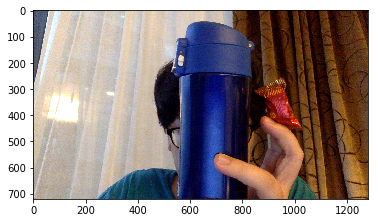

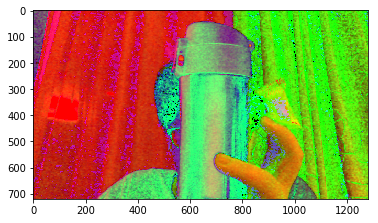

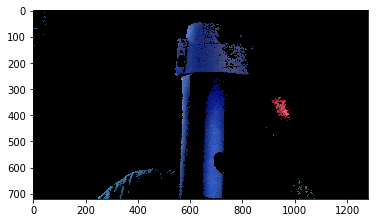

In [58]:
capture = cv.VideoCapture(0)

while True:
    
    ret, frame = capture.read()
    
    # BGR => HSV
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    
    # inrange(), put color between lower and upper to white, and other to black
    mask_blue = cv.inRange(hsv, lower_blue, upper_blue)
    mask_green = cv.inRange(hsv, lower_green, upper_green)
    mask_red = cv.inRange(hsv, lower_red, upper_red)
    mask = mask_blue + mask_green + mask_red
    
    # keep only blue part 
    res = cv.bitwise_and(frame, frame, mask=mask)
    
    plt.imshow(frame[:, :, ::-1])
    plt.show()
    plt.imshow(hsv[:, :, ::-1])
    plt.show()
    plt.imshow(res[:, :, ::-1])
    
    break

In [59]:
capture.release()